In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['averageRating'])

## Data Partitioning

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [22]:
# !pip install xgboost

In [17]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

reg = XGBRegressor(tree_method='exact', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 50 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, scoring='neg_mean_squared_error',
    cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise')

# Esegui la random search
random_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Migliori parametri trovati: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 1.0}
Miglior punteggio: -0.9789113439265197


In [18]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci il modello con i migliori iperparametri trovati
best_model = XGBRegressor(
    tree_method='exact', 
    use_label_encoder=True, 
    random_state=42,
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=1,
    n_estimators=300,
    max_depth=9,
    learning_rate=0.3,
    gamma=0.2,
    colsample_bytree=1, probability=True
)

# Addestra il modello con i dati di addestramento
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.504
MSE: 0.902
MAE: 0.663


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Supponendo che y_pred e y_test_numeric siano già definiti
# y_pred = best_model.predict(X_test)

# Definire gli intervalli
intervals = ['(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,9]', '(9,10]']

# Stampare l'accuratezza
print('Accuracy %s' % accuracy_score(y_test_numeric, y_pred))

# Stampare il F1-score
print('F1-score %s' % f1_score(y_test_numeric, y_pred, average=None))

print(classification_report(y_test_numeric, y_pred, target_names=intervals))

Accuracy 0.5245357495290213
F1-score [0.34285714 0.23036649 0.16204691 0.24508519 0.36613845 0.41662494
 0.47297933 0.6598757  0.47197845 0.54930796]
              precision    recall  f1-score   support

       (0,1]       0.67      0.23      0.34        26
       (1,2]       0.44      0.16      0.23       141
       (2,3]       0.33      0.11      0.16       353
       (3,4]       0.37      0.18      0.25      1027
       (4,5]       0.42      0.32      0.37      2719
       (5,6]       0.44      0.39      0.42      6372
       (6,7]       0.47      0.47      0.47     11643
       (7,8]       0.59      0.75      0.66     14463
       (8,9]       0.55      0.41      0.47      6563
      (9,10]       0.62      0.50      0.55      1281

    accuracy                           0.52     44588
   macro avg       0.49      0.35      0.39     44588
weighted avg       0.51      0.52      0.51     44588



In [ ]:
# Calcola la ROC curve e la Precision-Recall curve
y_pred_proba = best_model.predict_proba(X_test)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Supponiamo che questo sia il tuo dizionario di mapping
class_mapping = {0:'(0,1]', 1:'(1,2]', 2:'(2,3]', 3:'(3,4]', 4:'(4,5]', 5:'(5,6]', 6:'(6,7]', 7:'(7,8]', 8:'(8,9]', 9:'(9,10]'}

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_test
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))


for i, class_label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Check if class_label exists in class_mapping
    label = class_mapping.get(class_label, "Unknown class")
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()



KeyError: '(0, 1]'

<Figure size 1000x800 with 0 Axes>

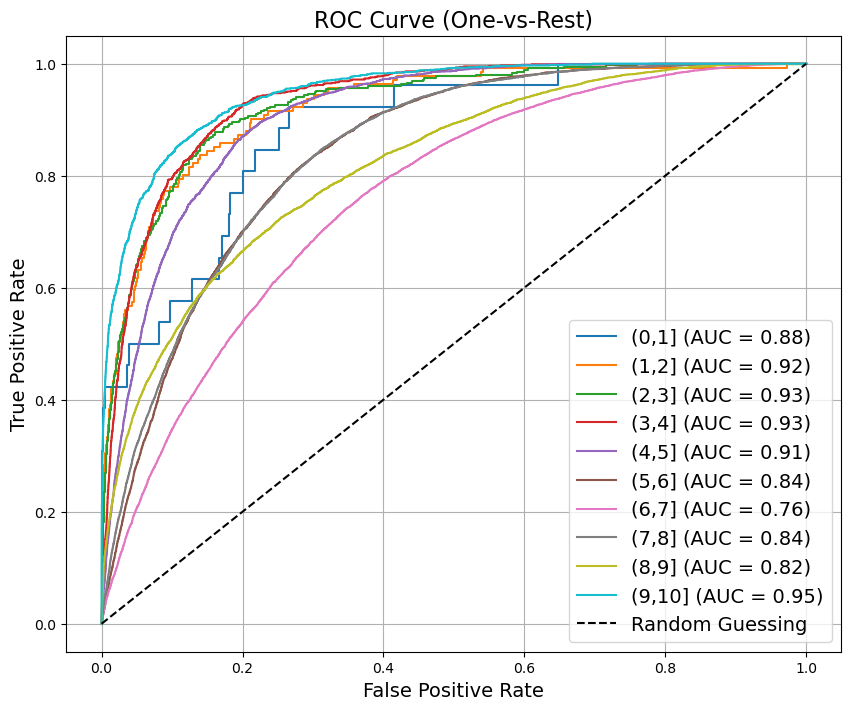

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Supponiamo che y_pred e y_test_numeric siano già definiti
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)

# Definire gli intervalli
intervals = ['(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,9]', '(9,10]']

# Binarizzare le etichette di test
y_test_bin = label_binarize(y_test_numeric, classes=range(10))

plt.figure(figsize=(10, 8))

for i in range(10):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    
    # Traccia la curva ROC con il nome della classe originale
    plt.plot(fpr, tpr, label=f"{intervals[i]} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid()
plt.show()

In [28]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")

0.8782202489141785

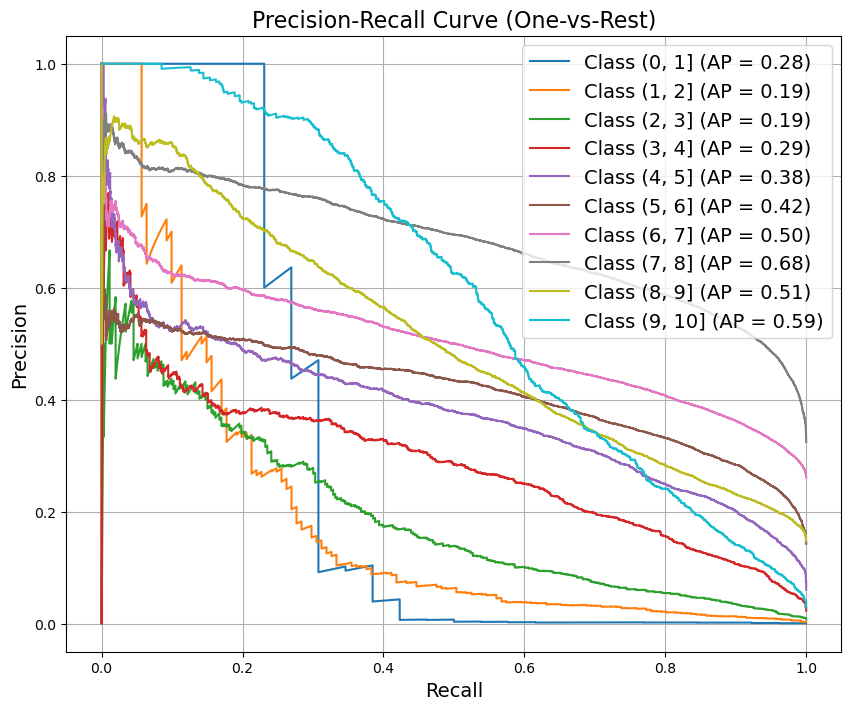

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.grid()
plt.show()